In [39]:
# Read me: 
"""
This Notebook uses 'yellow_tripdata_2015-01.csv' dataset which 
represent real taxi calls over manhetten recorded for january 2015

This notebook extracts the needed data for our DARP problem.
in the form of 'nyc2015_clean_sim.csv' containing only 
request ID , pick_up_time , src_ID and dest _ID. (node ID's are subjected to
G = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive'))
"""


"\nThis Notebook uses 'yellow_tripdata_2015-01.csv' dataset which \nrepresent real taxi calls over manhetten recorded for january 2015\n\nThis notebook extracts the needed data for our DARP problem.\nin the form of 'nyc2015_clean_sim.csv' containing only \nrequest ID , pick_up_time , src_ID and dest _ID.\n"

In [ ]:
import pandas as pd
import collections
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__
import pandas as pd
import datetime
from datetime import datetime


In [2]:
# Making request from real nyc taxi data , for Simulation

In [3]:
# Getting the Data
df2015 = pd.read_csv('yellow_tripdata_2015-01.csv')
# Sorting by pickupo time
df2015 = df2015.sort_values(by=['tpep_pickup_datetime'])
print(df2015.head())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8166863         1  2015-01-01 00:00:00   2015-01-01 00:11:26                5   
8166884         2  2015-01-01 00:00:00   2015-01-01 00:00:00                1   
8166885         2  2015-01-01 00:00:00   2015-01-01 00:00:00                3   
8166886         1  2015-01-01 00:00:01   2015-01-01 00:03:49                1   
8166887         2  2015-01-01 00:00:03   2015-01-01 00:21:48                2   

         trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
8166863           4.00        -73.971436        40.760201           1   
8166884           1.68        -73.991547        40.750069           1   
8166885           1.56        -74.001320        40.729057           1   
8166886           0.80        -73.860847        40.757294           1   
8166887           2.57        -73.969017        40.754269           1   

        store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_t

<class 'networkx.classes.multidigraph.MultiDiGraph'>


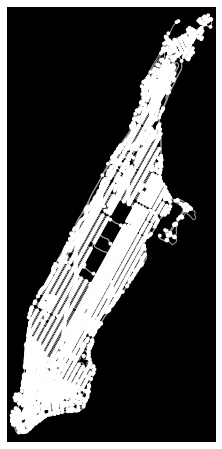

In [4]:
# New York map for processing
G = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive')
print(type(G))
fig, ax = ox.plot_graph(G, node_zorder=2, node_color='w', bgcolor='k')

In [5]:
# impute missing edge speeds then calculate edge travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [6]:
# Adding df2015['src'] & df['dst']
# get the nearest network nodes to two points
df2015['src'] = ox.distance.nearest_nodes(G, df2015['pickup_longitude'], df2015['pickup_latitude']) # Pellers House 
df2015['dst'] = ox.distance.nearest_nodes(G, df2015['dropoff_longitude'], df2015['dropoff_latitude'])

In [7]:
df2015.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,src,dst
8166863,1,2015-01-01 00:00:00,2015-01-01 00:11:26,5,4.00,-73.971436,40.760201,1,N,-73.921181,...,2,13.5,0.5,0.5,0.0,0.0,0.0,14.5,42448338,2298803428
8166884,2,2015-01-01 00:00:00,2015-01-01 00:00:00,1,1.68,-73.991547,40.750069,1,N,0.000000,...,2,10.0,0.0,0.5,0.0,0.0,0.3,10.8,42439440,2054405680
8166885,2,2015-01-01 00:00:00,2015-01-01 00:00:00,3,1.56,-74.001320,40.729057,1,N,-74.010208,...,1,7.5,0.5,0.5,0.0,0.0,0.3,8.8,1692433938,42436055
8166886,1,2015-01-01 00:00:01,2015-01-01 00:03:49,1,0.80,-73.860847,40.757294,1,N,-73.868111,...,2,5.0,0.5,0.5,0.0,0.0,0.0,6.3,2298803471,2298803471
8166887,2,2015-01-01 00:00:03,2015-01-01 00:21:48,2,2.57,-73.969017,40.754269,1,N,-73.994133,...,2,14.5,0.5,0.5,0.0,0.0,0.3,15.8,42438894,42432706


In [8]:
# Drop unwanted columns
df2015=df2015.drop(columns=['RateCodeID', 'store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','passenger_count','trip_distance','passenger_count','trip_distance'])
#df2015=df2015.drop(columns=['passenger_count','trip_distance'])

In [9]:
# Drops rows with bad data (bad ccordinates)

df2 = df2015[df2015.pickup_longitude != 0]
df2 = df2015[df2015.pickup_latitude != 0]
df2 = df2015[df2015.dropoff_longitude != 0]
df2 = df2015[df2015.dropoff_latitude != 0]

In [10]:
print("shape of df2")
print(df2.shape)
print("shape of df2015")
print(df2015.shape)
df2.head()


shape of df2
(12513667, 9)
shape of df2015
(12748986, 9)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,src,dst
8166863,1,2015-01-01 00:00:00,2015-01-01 00:11:26,-73.971436,40.760201,-73.921181,40.768269,42448338,2298803428
8166885,2,2015-01-01 00:00:00,2015-01-01 00:00:00,-74.001320,40.729057,-74.010208,40.719662,1692433938,42436055
8166886,1,2015-01-01 00:00:01,2015-01-01 00:03:49,-73.860847,40.757294,-73.868111,40.752285,2298803471,2298803471
8166887,2,2015-01-01 00:00:03,2015-01-01 00:21:48,-73.969017,40.754269,-73.994133,40.761600,42438894,42432706
5048596,2,2015-01-01 00:00:03,2015-01-01 00:10:50,-73.987579,40.765270,-73.976921,40.776970,1815133244,42435275


In [20]:
# Make CSV of df2
df2.to_csv('nyc2015_full_sim.csv')


In [23]:
#df3=pd.read_csv('nyc2015_full_sim.csv')

In [37]:
df2.head()

,tpep_pickup_datetime,src,dst
8166863,2015-01-01 00:00:00,42448338,2298803428
8166885,2015-01-01 00:00:00,1692433938,42436055
8166886,2015-01-01 00:00:01,2298803471,2298803471
8166887,2015-01-01 00:00:03,42438894,42432706
5048596,2015-01-01 00:00:03,1815133244,42435275


In [36]:
# To clear the data just to ID , pick_upo_time , src ID and dest ID

df2=df2.drop(columns=[ 'VendorID','tpep_dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','tpep_pickup_datetime2'])

In [27]:
# Make CSV of df2
df2.to_csv('nyc2015_clean_sim.csv')


In [28]:
df4=pd.read_csv('nyc2015_clean_sim.csv')